In [1]:
# Have function that exports an array with all of the individual .fcs files
# Can just then have the output set and then put in an array
# To access entries in array, user made for loop!!!

In [2]:
# Import FCS files. Variable input: name of path name to file. 
def importF(pathname):
    # Declare arrays and int
    file = []
    sample = []
    z = 0
    # Read in user input for file path and assign to array file 
    pathlist = Path(r'' + str(pathname)).glob('**/*.fcs')
    for path in pathlist:
        path_in_str = str(path)
        file.append(path_in_str)
    # Go through each file and assign the file contents to entry in the array sample
    for entry in file:
        sample.append(FCMeasurement(ID = 'Test Sample' + str(z), datafile = entry))
        z+=1
    importF.sample = sample
    # Returns the array sample which contains data of each file in folder (one file per entry in array)
    return sample


In [3]:
#Treg and NonTreg

# Function for creating and returning the T reg gate
def treg():
    # T reg: Take quad gates for T reg cells and combine them to create single, overall T reg gate
    treg1 = QuadGate((7.063e+03, 3.937e+03), ('BL1-H', 'VL1-H'), region='top left', name='treg1')
    treg2 = QuadGate((5.412e+03, 6.382e+03), ('BL1-H', 'VL1-H'), region='bottom right', name='treg2')
    treg_gate = treg1 & treg2
    return treg_gate

# Function for creating and returning the Non T reg gate
def nonTreg():
    # non T reg: Take quad gates for non T reg cells and combine to create overall non T reg gate
    nonTreg1 = QuadGate((5.233e+03, 1.731e+03), ('BL1-H', 'VL1-H'), region='top left', name='nonTreg1')
    nonTreg2 = QuadGate((2.668e+03, 5.692e+03), ('BL1-H', 'VL1-H'), region='bottom right', name='nonTreg2')
    nonTreg_gate = nonTreg1 & nonTreg2
    return nonTreg_gate

# Function that returns the number of T Reg cells in a given file
def countTR(sample_i, treg_gate):
     # Import single file and save data to a variable --> transform to logarithmic scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL1-H'])
    # Apply T reg gate to overall data --> step that detrmines which cells are T reg
    treg = smpl.gate(treg_gate)
    # Number of events (AKA number of cells)
    treg_count = treg.get_data().shape[0]
    #print('Number of Treg cells:' + str(treg_count))
    return treg_count

# Function that returns the number of Non T Reg cells in a given file
def countNTR(sample_i, nonTreg_gate):  
    # Import single file and save data to a variable --> transform to logarithmic scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL1-H'])
    # Apply non T reg gate to overall data --> step that detrmines which cells are non T reg
    nonTreg = smpl.gate(nonTreg_gate)
    # Number of events (number of cells)
    nonTreg_count = nonTreg.get_data().shape[0]
    # print('Number of Non Treg cells:' + str(nonTreg_count))
    return nonTreg_count

# Function that returns the raw data of T Reg cells in a given file
def tregRD(sample_i, treg_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL1-H'])
    # Apply T reg gate to overall data --> step that detrmines which cells are T reg
    treg = smpl.gate(treg_gate)  
    # Get raw data of t reg cells in file
    tregdata = treg.get_data()
    return tregdata

# Function that returns the raw data of Non T Reg cells in a given file
def nonTregRD(sample_i, nonTreg_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL1-H'])
    # Apply non T reg gate to overall data --> step that detrmines which cells are non T reg
    nonTreg = smpl.gate(nonTreg_gate)
    # Get raw data of gated non T reg cells
    nonTregdata = nonTreg.get_data()
    return nonTregdata

# Function that is used to plot the Treg and NonTreg gates
# Treg (yellow) and Non Treg (green)
def tcells(sample_i, treg_gate, nonTreg_gate):
    # Assign data of current file for analysis to variable smpl and transform to log scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL1-H'])
    # CD25 v. Foxp33: VL1 v. BL1
    # Treg
    # Apply T reg gate to overall data --> step that determines which cells are Treg
    treg = smpl.gate(treg_gate)
    # Non Tregs
    # Apply non T reg gate to overall data --> step that detrmines which cells are non T reg
    nonTreg = smpl.gate(nonTreg_gate)
    
    # Declare figure and axis
    fig, ax = plt.subplots()
    # Plot the treg gate
    treg.plot(['BL1-H','VL1-H'], color = 'y')
    # Plot the non Treg gate
    nonTreg.plot(['BL1-H','VL1-H'], color = 'g')
    # Plot all of the cells in the file
    smpl.plot(['BL1-H','VL1-H'])
        
    # Show figures
    plt.show    

In [4]:
def nk():
    # NK cells: Take quad gates for NK cells and combine them to create single, overall NK gate
    nk1 = QuadGate((6.468e+03, 4.861e+03), ('BL1-H', 'VL4-H'), region='top left', name='nk1')
    nk2 = QuadGate((5.550e+03, 5.813e+03), ('BL1-H', 'VL4-H'), region='bottom right', name='nk2')
    nk_gate = nk1 & nk2
    return nk_gate

def bnk():
    # Bright NK cells: Take quad gates for bright NK cells and combine them to create single, overall bright NK gate
    bnk1 = QuadGate((7.342e+03, 4.899e+03), ('BL1-H', 'VL4-H'), region='top left', name='bnk1')
    bnk2 = QuadGate((6.533e+03, 5.751e+03), ('BL1-H', 'VL4-H'), region='bottom right', name='bnk2')
    bnk_gate = bnk1 & bnk2
    return bnk_gate

def cd():
    # CD cells: Take quad gates for CD cells and combine them to create single, overall CD gate
    cd1 = QuadGate((9.016e+03, 5.976e+03), ('RL1-H', 'VL4-H'), region='top left', name='cd1')
    cd2 = QuadGate((6.825e+03, 7.541e+03), ('RL1-H', 'VL4-H'), region='bottom right', name='cd2')
    cd_gate = cd1 & cd2
    return cd_gate

def countNK(sample_i, nk_gate):
    # Import single file and save data to a variable --> transform to logarithmic scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply NK gate to overall data --> step that detrmines which cells are NK
    nk = smpl.gate(nk_gate)
    # Number of events (AKA number of cells)
    nk_count = nk.get_data().shape[0]
    #print('Number of NK cells:' + str(nk_count))
    return nk_count

def countBNK(sample_i, bnk_gate):
    # Import single file and save data to a variable --> transform to logarithmic scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply bright NK gate to overall data --> step that detrmines which cells are NK
    bnk = smpl.gate(bnk_gate)
    # Number of events (AKA number of cells)
    bnk_count = bnk.get_data().shape[0]
    #print('Number of Bright NK cells:' + str(bnk_count))
    return bnk_count

def countCD(sample_i, cd_gate):
    # Import single file and save data to a variable --> transform to logarithmic scale
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply CD gate to overall data --> step that detrmines which cells are CD
    cd = smpl.gate(cd_gate)
    # Number of events (AKA number of cells)
    cd_count = cd.get_data().shape[0]
    #print('Number of CD cells:' + str(cd_count))
    return cd_count

# Function that returns the raw data of NK cells in a given file
def nkRD(sample_i, nk_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply NK gate to overall data --> step that detrmines which cells are NK
    nk = smpl.gate(nk_gate)  
    # Get raw data of nk cells in file
    nkdata = nk.get_data()
    return nkdata

# Function that returns the raw data of BNK cells in a given file
def bnkRD(sample_i, bnk_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply Bright NK gate to overall data --> step that detrmines which cells are Bright NK
    bnk = smpl.gate(bnk_gate)  
    # Get raw data of bright NK cells in file
    bnkdata = bnk.get_data()
    return bnkdata

# Function that returns the raw data of CD cells in a given file
def cdRD(sample_i, cd_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    # Apply CD gate to overall data --> step that detrmines which cells are CD
    cd = smpl.gate(cd_gate)  
    # Get raw data of CD cells in file
    cddata = cd.get_data()
    return cddata

# Function that plots the graph of NK and Bright NK cells (both are determined by same x, y-axis)
# Arguemnt 1: current sample (a single file)
# Argument 2: the gate for NK
# Argument 3: the gate for bright NK 
def nk_bnk_plot(sample_i, nk_gate, bnk_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])

    # CD3 v. CD56: VL4 v. BL1
    # NK
    # Apply NK gate to overall data --> step that determines which cells are NK
    nk = smpl.gate(nk_gate)
    # CD56 Bright NK
    # Apply Bright NK gate to overall data --> step that determines which cells are Bright NK
    bnk = smpl.gate(bnk_gate)
    
    fig1, ax1 = plt.subplots()
    nk.plot(['BL1-H','VL4-H'], color = 'y')
    bnk.plot(['BL1-H','VL4-H'], color = 'g')
    smpl.plot(['BL1-H','VL4-H'])

# Function that plots the graph of CD cells
# Argument 1: current sample (a single file)
# Argument 2: the gate for CD cells
def cd_plot(sample_i, cd_gate):
    smpl = sample_i.transform('hlog', channels=['BL1-H','VL4-H','RL1-H'])
    #CD3 v. CD8: VL4 v. RL1
    #CD3+CD8+
    # Apply CD cell gate to overall data --> step that determines which cells are CD
    cd = smpl.gate(cd_gate)

    fig2, ax2 = plt.subplots()
    cd.plot(['RL1-H','VL4-H'],color='r')
    smpl.plot(['RL1-H','VL4-H'])

/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


What is the name of the T plate folder path?: Tplate
What is the name of the NK plate folder path?: NKplate


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


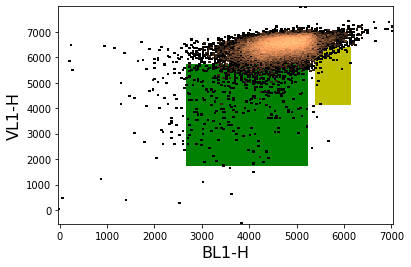

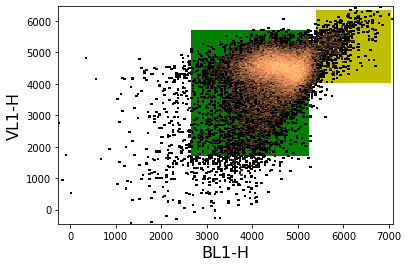

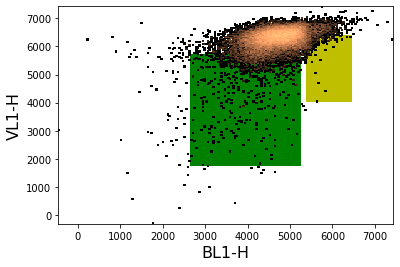

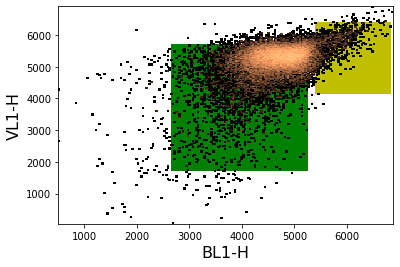

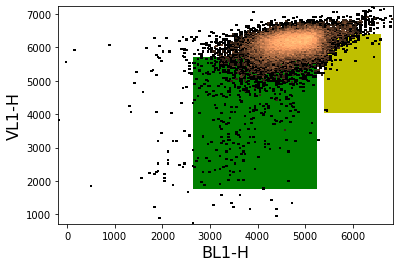

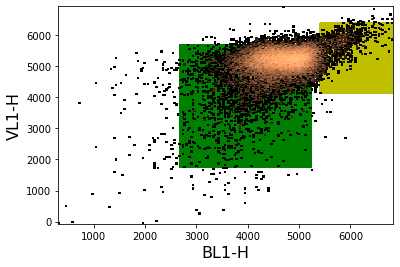

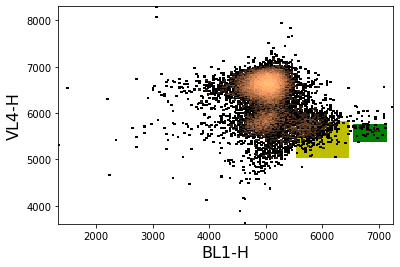

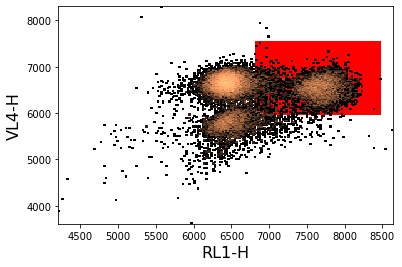

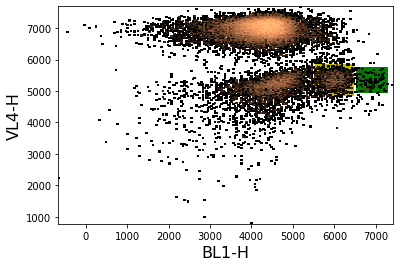

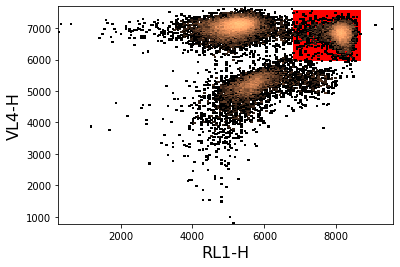

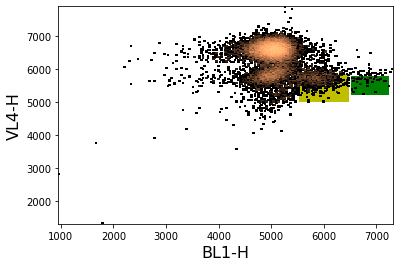

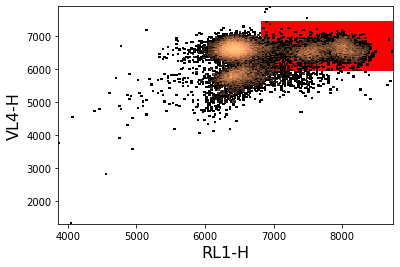

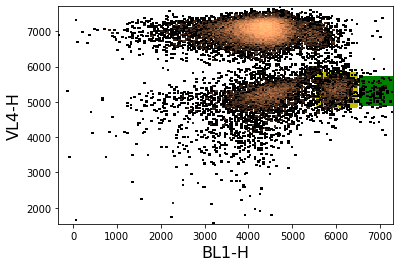

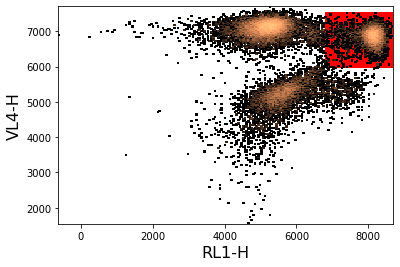

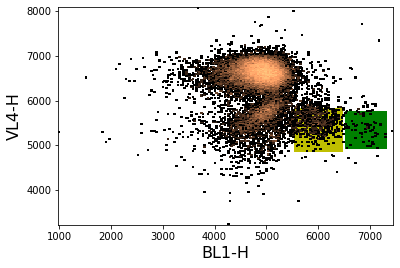

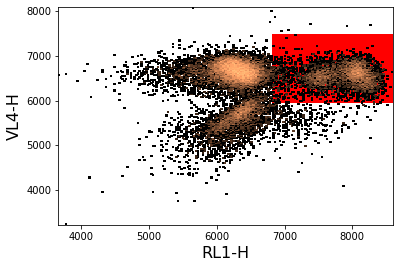

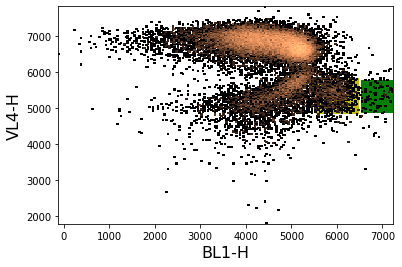

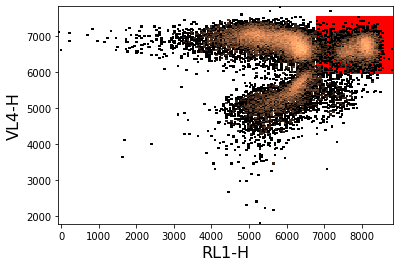

In [5]:
# Import all necessary packages to run functions
import matplotlib
import numpy as np
import pandas
import scipy
import FlowCytometryTools
import pylab
import sys
import pathlib
from matplotlib import pyplot as plt
from pathlib import Path
from FlowCytometryTools import test_data_dir, test_data_file
from FlowCytometryTools import FCMeasurement
from matplotlib.backends.backend_pdf import PdfPages
from FlowCytometryTools import ThresholdGate, PolyGate, QuadGate
%matplotlib inline

tplate = input('What is the name of the T plate folder path?:')
sampleT = importF(tplate)
NKplate = input('What is the name of the NK plate folder path?:')
sampleNK = importF(NKplate)

treg_count = []
nonTreg_count = []
nk_count = []
bnk_count = []
cd_count = []

treg_data = []
nonTreg_data = []
nk_data = []
bnk_data = []
cd_data = []

treg_gate = treg()
nonTreg_gate = nonTreg()
nk_gate = nk()
bnk_gate = bnk()
cd_gate = cd()

for i, sample_i in enumerate(sampleT):
    treg_count.append(countTR(sample_i, treg_gate))
    nonTreg_count.append(countNTR(sample_i, nonTreg_gate))
    treg_data.append(tregRD(sample_i, treg_gate))
    nonTreg_data.append(nonTregRD(sample_i, nonTreg_gate))
    tcells(sample_i, treg_gate, nonTreg_gate)
    
for i, sample_i in enumerate(sampleNK):
    nk_count.append(countNK(sample_i, nk_gate))
    bnk_count.append(countBNK(sample_i, bnk_gate))
    cd_count.append(countCD(sample_i, cd_gate))
    
    nk_data.append(nkRD(sample_i, nk_gate))
    bnk_data.append(bnkRD(sample_i, bnk_gate))
    cd_data.append(cdRD(sample_i, cd_gate))
    
    nk_bnk_plot(sample_i, nk_gate, bnk_gate)
    cd_plot(sample_i, cd_gate)
    
    
#print('Count of T reg cells in the file: ', treg_count)
#print('Count of non T reg cells in the file: ', nonTreg_count)
#print('Data of T reg cells: ', treg_data)
#print('Data of non T reg cells in the file: ', nonTreg_data)